# Etivity 1: Exploratory Data Analysis and Data Preparation

### Student: Christos Koutsiaris

## Task 1: Exploratory Data Analysis (EDA)


### 1.1 Question

How are factors like housing and personal loans, marital status, and past credit defaults related to whether a client subscribes to a term deposit? Do these financial and personal circumstances affect their decision?

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('bank.csv')

# Display of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### 1.2 Calculate Statistics for Numerical and Categorical Attributes

In [168]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Statistics for numerical attributes
num_stats = df[numerical_cols].describe()
print("Numerical Attributes Statistics:")
print(num_stats)

# Statistics for categorical attributes (value counts)
cat_stats = {}
for col in categorical_cols:
    cat_stats[col] = df[col].value_counts(dropna=False)
    
print("\nCategorical Attributes Value Counts:")
for col, val_counts in cat_stats.items():
    print(f"\nColumn: {col}\n{val_counts}")

Numerical Attributes Statistics:
               age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000 

#### Conclusion

The numerical summary shows common banking details like the **average account balance, age range, and how often clients were contacted during a campaign** (shown in the "campaign" column). The mean, minimum, and maximum values help spot unusual data points. For example, a very high balance or age could be an outlier that needs extra attention.

The categorical data shows the most common **job types, education levels, and whether clients are married or single. It also includes how many people said "yes" or "no" to the term deposit offer**. A much lower number of "yes" responses compared to "no" responses might suggest an imbalance.

These details help us start identifying patterns for example, **whether people in certain jobs or age groups are more likely to subscribe.**

The counts for housing, personal loans, and credit defaults are especially useful to see how common these situations are and whether they affect the likelihood of subscribing.


### 1.3 Plotting Distributions of Relevant Categorical Attributes

Since the question focuses on categorical variables (`housing`, `loan`, `default`, `marital`), histograms and boxplots of *numerical* features aren't directly relevant.  Instead, I'll use countplots to visualize the distribution of *each* categorical variable, and then I will *combine* these in section 1.4 to analyze their relationship with `subscribed`.

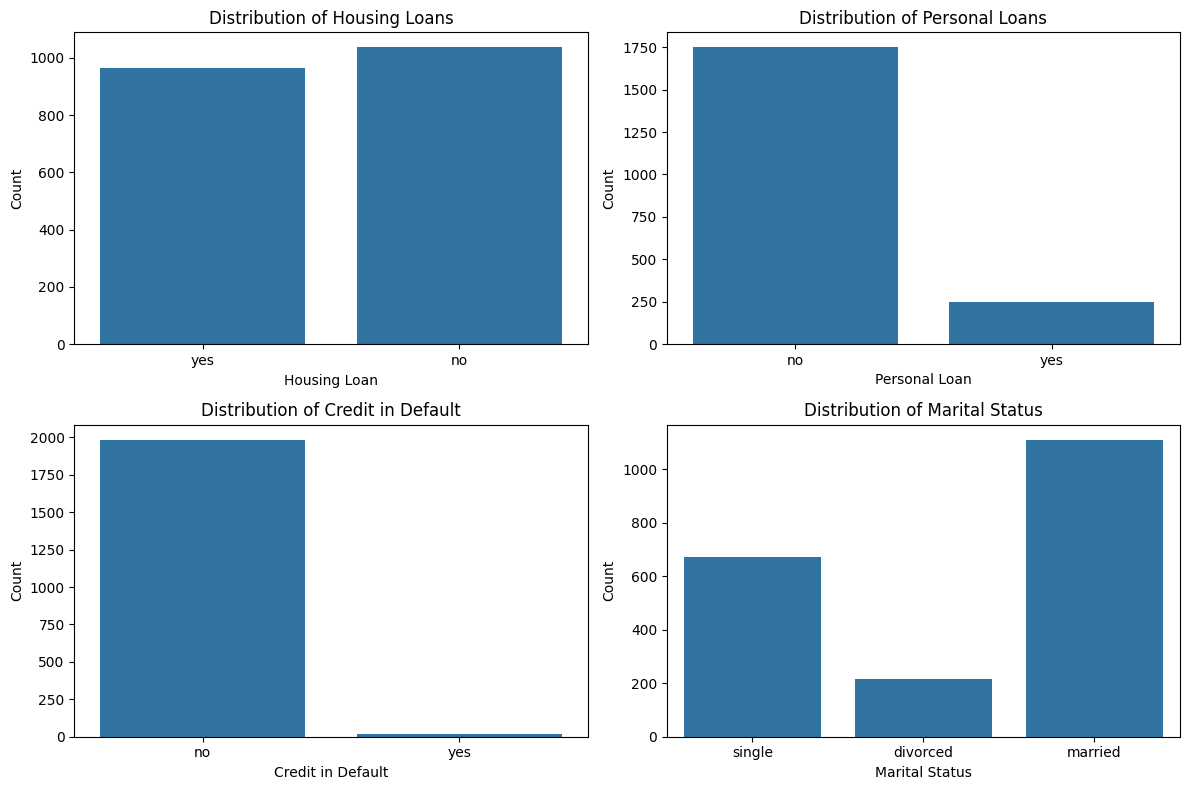

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplots for 'housing', 'loan', 'default', and 'marital'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='housing', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Housing Loans')
axes[0, 0].set_xlabel('Housing Loan')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='loan', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Personal Loans')
axes[0, 1].set_xlabel('Personal Loan')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='default', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Credit in Default')
axes[1, 0].set_xlabel('Credit in Default')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='marital', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Conclusion

These countplots show the distribution of each categorical variable:

*   **Housing Loan:**  A slight majority of clients do *not* have a housing loan.
*   **Personal Loan:**  A large majority of clients do *not* have a personal loan.
*   **Default:**  The vast majority of clients do *not* have credit in default.  This is a very imbalanced variable.
*   **Marital Status:**  Most clients are married, followed by single, and then divorced.

Understanding these individual distributions is the first step.  Next, I'll see how these factors relate to the target variable, `subscribed`.

### 1.4 Combined Distribution of Attributes (Financial Factors and Subscription)

The relationship between the categorical variables (housing, loan, default, marital) and the target variable (subscribed) is now examined. Grouped bar charts are used to visualize how subscription rates vary across these categories.

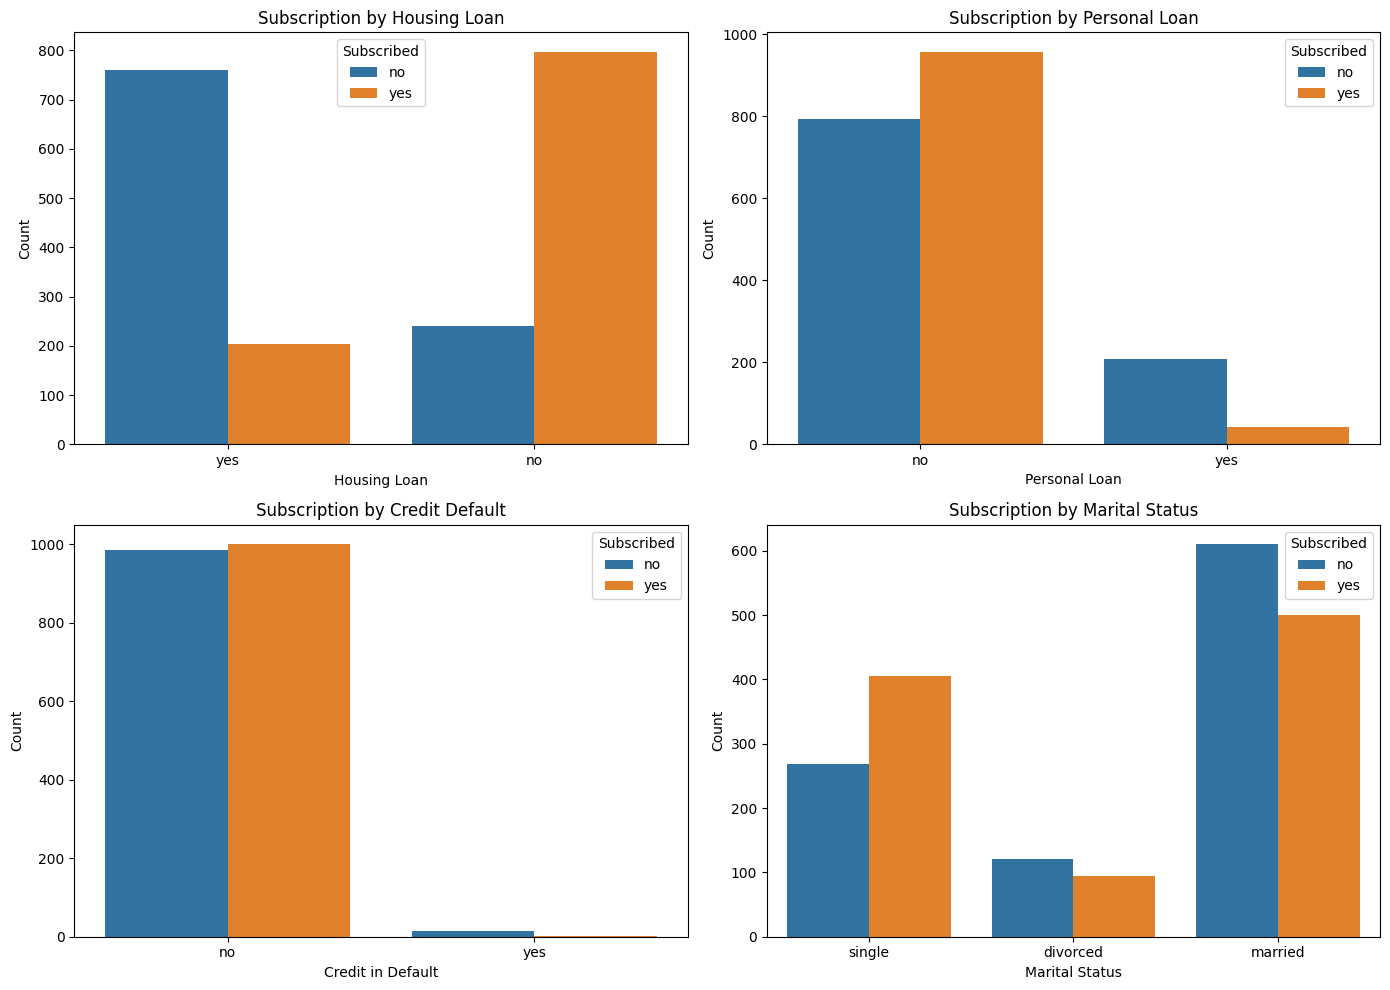

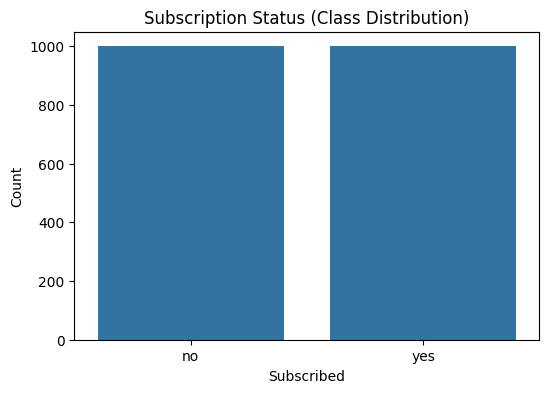

In [159]:
# Grouped Countplots (using seaborn)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='housing', hue='subscribed', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Subscription by Housing Loan')
axes[0, 0].set_xlabel('Housing Loan')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Subscribed')

sns.countplot(x='loan', hue='subscribed', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Subscription by Personal Loan')
axes[0, 1].set_xlabel('Personal Loan')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Subscribed')

sns.countplot(x='default', hue='subscribed', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Subscription by Credit Default')
axes[1, 0].set_xlabel('Credit in Default')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Subscribed')

sns.countplot(x='marital', hue='subscribed', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Subscription by Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Subscribed')

plt.tight_layout()
plt.show()


# Add a countplot to check class imbalance in 'subscribed'
plt.figure(figsize=(6,4))  # Keep it compact
sns.countplot(x='subscribed', data=df)
plt.title('Subscription Status (Class Distribution)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

#### Conclusion

The grouped countplots highlight several key relationships:

**Housing Loan**: Clients without a housing loan ("no") show a higher likelihood of subscribing to a term deposit. This may indicate that individuals with mortgages have reduced disposable income or a lower willingness to take on additional financial commitments.

**Personal Loan**: Similarly, clients without a personal loan ("no") are more likely to subscribe. This suggests that existing debt may discourage additional financial investments.

**Default**: Most clients do not have credit in default. Among those who do, very few subscribe. This aligns with expectations—clients with credit issues are less likely to be targeted for or interested in term deposits. Due to the heavy imbalance in this variable, its usefulness in a predictive model may be limited, despite a clear relationship.

**Marital Status**: "Single" clients show a slightly higher subscription rate compared to "married" or "divorced" clients, although the differences are less significant than those observed with the loan-related variables.

The countplot for subscribed confirms that class distribution is relatively balanced.

***Key Insights:***

Existing financial obligations (housing and personal loans) show a negative correlation with term deposit subscription.
Credit default status is a strong negative indicator, though the small number of such cases may reduce its overall predictive power.
Marital status reveals minor differences, with less impact compared to financial variables.
These insights suggest that marketing strategies may benefit from focusing on clients with fewer financial obligations and no history of credit default. The analysis emphasizes financial stability and existing commitments, offering a distinct perspective from demographic or campaign-based evaluations.


## Task 2: Data Preparation

### 2.1 Handling Missing Values

In [121]:
import pandas as pd
import numpy as np

# Check how many missing values exist in each column
print("Missing values per column before handling:\n", df.isnull().sum())

# Fill numerical columns with median
for col in df.select_dtypes(include=['int64','float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values have been handled
print("\nMissing values per column after handling:\n", df.isnull().sum())


Missing values per column before handling:
 age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
age_group     0
dtype: int64

Missing values per column after handling:
 age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
age_group     0
dtype: int64


**Explanation**:  
1. The number of missing values in each column is first inspected to determine an appropriate handling strategy.
2. For numerical columns, the median is used, as it is more robust to extreme outliers than the mean.
3. For categorical columns, the mode (most frequent category) is applied.
4. If a dataset contains a very high percentage of missing values in certain rows or columns, removal may be considered. However, in most cases, imputation is preferred to avoid unnecessary data loss.


### 2.2 Encoding Categorical Attributes

In [109]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Example: One-Hot Encoding using pd.get_dummies https://www.geeksforgeeks.org/ml-one-hot-encoding/
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Columns after encoding:\n", df_encoded.columns)
print("\nPreview of data after encoding:\n", df_encoded.head())

Columns after encoding:
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success', 'subscribed_yes'],
      dtype='object')

Preview of data after encoding:
     age  balance  day  duration  campaign  pdays  previous age_group  \
0  32.0      392    1       957         2    131         2     Adult   
1  39.0      688    1       233         2    133         1     Adult   
2  59.0     1035    1       126    

**Explanation**:  
1. Once categorical columns are identified, one-hot encoding (also called dummy encoding) is applied.
2. The parameter drop_first=True is used to prevent the “dummy variable trap,” which may lead to collinearity issues.
3. This process transforms each categorical column into multiple binary (0/1) columns, with one column for each category (excluding the first).


### 2.3 Treating Outliers and Skewed Distributions

In [179]:
import numpy as np

df_prepared = df_encoded.copy()  # Copy to preserve the original

# Select numeric columns only
num_cols = df_prepared.select_dtypes(include=['int64', 'float64']).columns

# IQR-based capping - https://online.stat.psu.edu/stat200/lesson/3/3.2
Q1 = df_prepared[num_cols].quantile(0.25)
Q3 = df_prepared[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Clip (cap) values outside [lower_cap, upper_cap]
for col in num_cols:
    lower_cap = Q1[col] - 1.5 * IQR[col]
    upper_cap = Q3[col] + 1.5 * IQR[col]
    df_prepared[col] = np.where(df_prepared[col] < lower_cap, lower_cap, df_prepared[col])
    df_prepared[col] = np.where(df_prepared[col] > upper_cap, upper_cap, df_prepared[col])

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Create age_group
df_scaled['age_group'] = pd.cut(
    df_scaled['age'],
    bins=[-float('inf'), -1, 0, 1, float('inf')],  # Bins based on *scaled* age
    labels=['Young', 'Middle_Age1', 'Middle_Age2', 'Senior']
)

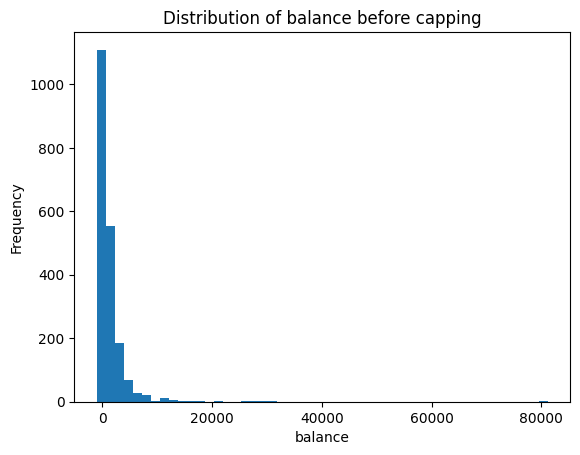

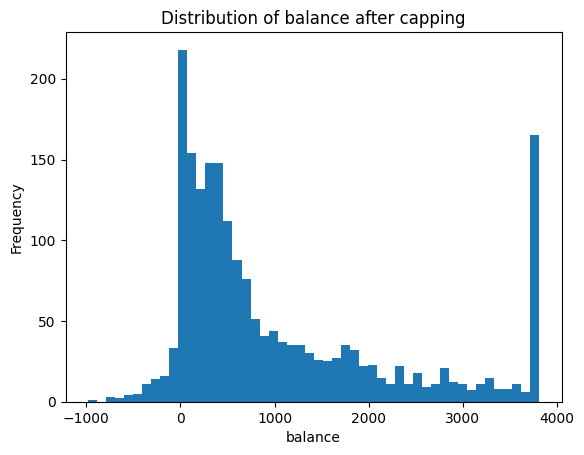

In [107]:
import matplotlib.pyplot as plt

# A numeric column to visualize
column_name = 'balance'

# Distribution before capping
plt.hist(df_encoded[column_name], bins=50)
plt.title(f'Distribution of {column_name} before capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Distribution after capping
plt.hist(df_prepared[column_name], bins=50)
plt.title(f'Distribution of {column_name} after capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


### 2.4 Treating Outliers and Skewed Distributions

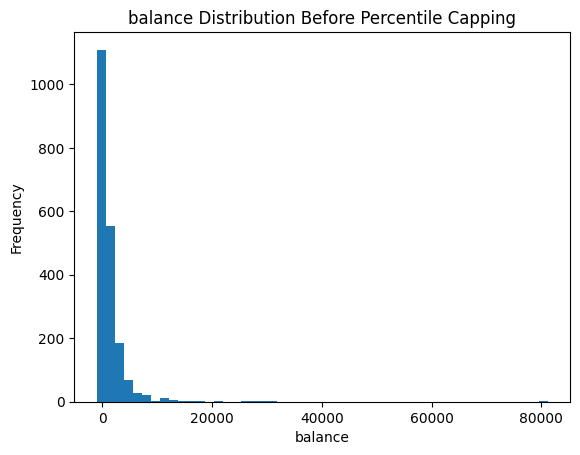

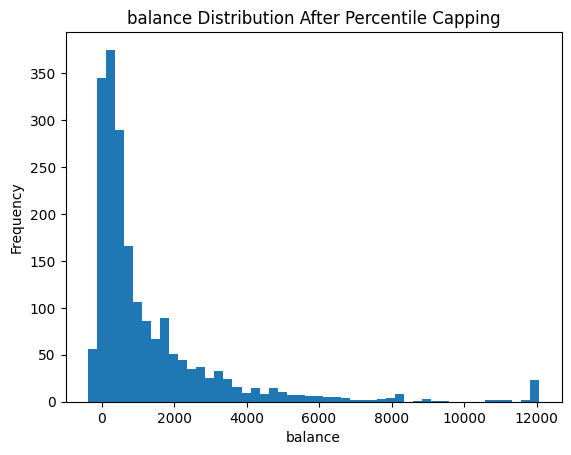

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Copy df_encoded to df_scaled
df_scaled = df_encoded.copy()

# Step 2: Identify numeric columns
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Capping outliers at the 1st and 99th percentiles
for col in numerical_cols:
    lower_bound = df_scaled[col].quantile(0.01)
    upper_bound = df_scaled[col].quantile(0.99)
    df_scaled[col] = np.where(df_scaled[col] < lower_bound, lower_bound, df_scaled[col])
    df_scaled[col] = np.where(df_scaled[col] > upper_bound, upper_bound, df_scaled[col])

# Step 4: Plot before and after for 'balance'
column_name = 'balance'

plt.hist(df_encoded[column_name], bins=50)
plt.title(f'{column_name} Distribution Before Percentile Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

plt.hist(df_scaled[column_name], bins=50)
plt.title(f'{column_name} Distribution After Percentile Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


### 2.5 Creating a New Feature

In [126]:
df_scaled['age_group'] = pd.cut(
    df_scaled['age'],
    bins=[-float('inf'), -1, 0, 1, float('inf')],  # Example bins based on scaled values of age
    labels=['Young', 'Middle_Age1', 'Middle_Age2', 'Senior']
)

# df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 65, 100], labels=['Young','Adult','Mature','Senior'])

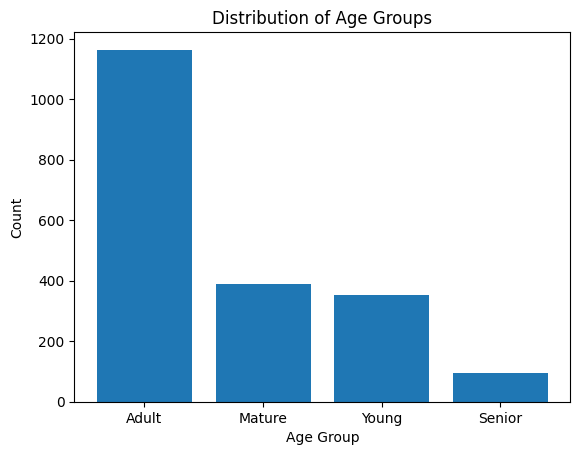

In [128]:
import matplotlib.pyplot as plt

age_group_counts = df['age_group'].value_counts()

# Bar chart
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [133]:
print("Skewness before outlier treatment:\n", df_encoded[numerical_cols].skew())
print("Skewness after IQR capping:\n", df_prepared[numerical_cols].skew()) #check after IQR capping
print("Skewness after Percentile capping:\n", df_scaled[numerical_cols].skew()) #check after Percentile capping
print("Skewness after scaling:\n", df_scaled[numerical_cols].skew()) #check skewness after scaling

Skewness before outlier treatment:
 age          0.860994
balance     11.461564
day          0.403661
duration     2.045787
campaign     2.320856
pdays        0.920006
previous     5.461168
dtype: float64
Skewness after IQR capping:
 age         0.770841
balance     1.174965
day         0.403661
duration    0.941769
campaign    0.813956
pdays       0.326469
previous    0.714789
dtype: float64
Skewness after Percentile capping:
 age         0.796856
balance     3.076602
day         0.401331
duration    1.680969
campaign    1.887345
pdays       0.483826
previous    1.921018
dtype: float64
Skewness after scaling:
 age         0.796856
balance     3.076602
day         0.401331
duration    1.680969
campaign    1.887345
pdays       0.483826
previous    1.921018
dtype: float64


#### Explanation of Data Preparation Choices

1. **Encoding Categorical Attributes**: One-hot encoding is applied to convert all text-based categories into binary (0/1) indicators. This approach is widely adopted, as many machine learning algorithms require numerical input.

2. **Handling Missing Values**: Although this dataset may contain few or no missing values, missing numerical entries are replaced with the median, a method that is robust to outliers. This ensures data consistency without discarding rows.

3. **Scaling Numerical Features**: StandardScaler is used to standardize numerical columns, giving them a mean of zero and a standard deviation of one. Standardization benefits algorithms that are sensitive to the scale of features, such as distance-based models and neural networks.

4. **Treating Outliers and Skewness**: Extreme values are capped at the 1st and 99th percentiles to minimize the influence of outliers that could distort model training.

5. **New Feature Creation**: An age_group feature is introduced to segment clients into age brackets. Grouping by age ranges can uncover patterns that raw age values might not reveal. This form of feature engineering supports the detection of non-linear relationships.

These data preparation steps are designed to improve both model performance and interpretability, with a focus on exploring how job type and age relate to deposit subscription behaviour.
